### Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for inhance visualization

In [2]:
# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)
# pd.reset_option('display.max_rows')
# pd.reset_option('display.max_columns')

In [3]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

# Stroke Prediction Dataset Description
This dataset is used to predict whether a person is likely to suffer a stroke based on demographic and health-related parameters.

## Dataset Overview

The dataset contains **multiple records** of individuals with the following features:

| Column Name        | Description |
|--------------------|-------------|
| `id`               | Unique identifier for each patient |
| `gender`           | Gender of the patient: `Male` or `Female` |
| `age`              | Age of the patient |
| `hypertension`     | Binary: `1` if the patient has hypertension, else `0` |
| `heart_disease`    | Binary: `1` if the patient has a heart disease, else `0` |
| `ever_married`     | Whether the patient has ever been married: `Yes` or `No` |
| `work_type`        | Type of employment: `Private`, `Self-employed`, `Govt_job`, `children`, or `Never_worked` |
| `Residence_type`   | Type of residence: `Urban` or `Rural` |
| `avg_glucose_level`| Average glucose level in blood |
| `bmi`              | Body Mass Index |
| `smoking_status`   | Smoking status: `formerly smoked`, `never smoked`, `smokes`, or `Unknown` |
| `stroke`           | Binary: `1` if the patient had a stroke, else `0`

### Target Variable

- `stroke`: The main label to predict. The goal is to identify patterns that lead to a stroke based on the other features.

#### Notes
- This dataset is imbalanced — there are far fewer stroke cases (`stroke = 1`) than non-stroke cases (`stroke = 0`).
- Honstely i get this **Markdawn format** from **AI tool**

In [4]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [6]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
for col in data.columns:
    print(data[col].value_counts())
    print('-'*30)

id
9046     1
22194    1
15104    1
28315    1
56996    1
        ..
897      1
4789     1
5686     1
37451    1
44679    1
Name: count, Length: 5110, dtype: int64
------------------------------
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64
------------------------------
age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64
------------------------------
hypertension
0    4612
1     498
Name: count, dtype: int64
------------------------------
heart_disease
0    4834
1     276
Name: count, dtype: int64
------------------------------
ever_married
Yes    3353
No     1757
Name: count, dtype: int64
------------------------------
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64
------------------------------
Residence_type
Urban    259

## Data Preprocessing

In [9]:
df = data.copy()

#### Drop unuseful columns

In [10]:
df.drop(columns='id', inplace=True)

In [11]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


#### Drop invalid data

In [12]:
df[df['gender'] == 'Other']

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


In [13]:
df = df[~(df['gender'] == 'Other')]

In [14]:
df['gender'].value_counts()

gender
Female    2994
Male      2115
Name: count, dtype: int64

#### Handle float values in age column

In [15]:
df['age'].value_counts()

age
78.00    102
57.00     95
52.00     90
54.00     87
51.00     86
        ... 
1.40       3
0.48       3
0.16       3
0.40       2
0.08       2
Name: count, Length: 104, dtype: int64

In [16]:
df['age'] = df['age'].astype('int')

In [17]:
df['age'].value_counts()

age
78    102
57     95
52     90
54     87
51     86
     ... 
11     36
10     35
4      34
7      32
6      24
Name: count, Length: 83, dtype: int64

#### Handle category `Unknown` in `smoking_status` column

In [18]:
mode = df['smoking_status'].mode()
mode

0    never smoked
Name: smoking_status, dtype: object

In [19]:
# Replace Unknown with the most frequent category
df['smoking_status'] = df['smoking_status'].replace({'Unknown':mode[0]})

In [20]:
df['smoking_status'].value_counts()

smoking_status
never smoked       3436
formerly smoked     884
smokes              789
Name: count, dtype: int64

#### Handle Duplicates

In [21]:
df.duplicated().sum()

0

#### Handle Missing values

In [22]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [23]:
print('median of BMI is:',df['bmi'].median())
print('mean of BMI is:',df['bmi'].mean())

median of BMI is: 28.1
mean of BMI is: 28.894559902200488


<Axes: ylabel='bmi'>

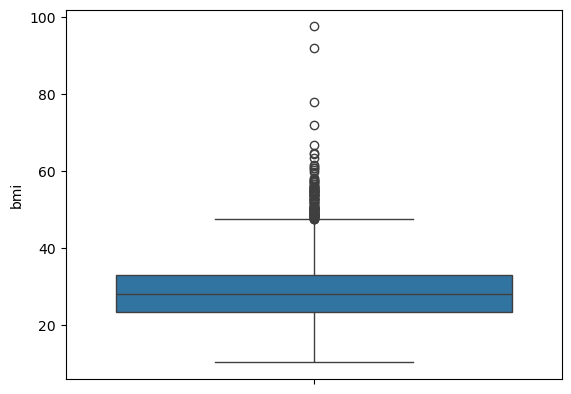

In [24]:
sns.boxplot(df['bmi'])

In [25]:
# # Because there are alot of Outliers, will impute nulls with Median
# df['bmi'] = df['bmi'].fillna(df['bmi'].median())

In [26]:
# use KNN Imputation
from sklearn.impute import KNNImputer

numeric_columns = df.select_dtypes('number').columns
df_knn = df[numeric_columns].copy()

In [27]:
df_knn

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67,0,1,228.69,36.6,1
1,61,0,0,202.21,NaN,1
2,80,0,1,105.92,32.5,1
3,49,0,0,171.23,34.4,1
4,79,1,0,174.12,24.0,1
...,...,...,...,...,...,...
5105,80,1,0,83.75,NaN,0
5106,81,0,0,125.20,40.0,0
5107,35,0,0,82.99,30.6,0
5108,51,0,0,166.29,25.6,0


In [28]:
# Initialize KNN imputer
imputer = KNNImputer(n_neighbors=5)
df_knn_imputed = imputer.fit_transform(df_knn)

In [29]:
# Update the 'bmi' column in the original df
df['bmi'] = df_knn_imputed[:, df_knn.columns.get_loc('bmi')]

In [30]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,27.12,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.00,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.60,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.60,formerly smoked,0


In [31]:
df.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

### Handle Outliers

In [32]:
df.select_dtypes('number').head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67,0,1,228.69,36.60,1
1,61,0,0,202.21,31.38,1
2,80,0,1,105.92,32.50,1
3,49,0,0,171.23,34.40,1
4,79,1,0,174.12,24.00,1


In [33]:
columns = ['age', 'avg_glucose_level', 'bmi']

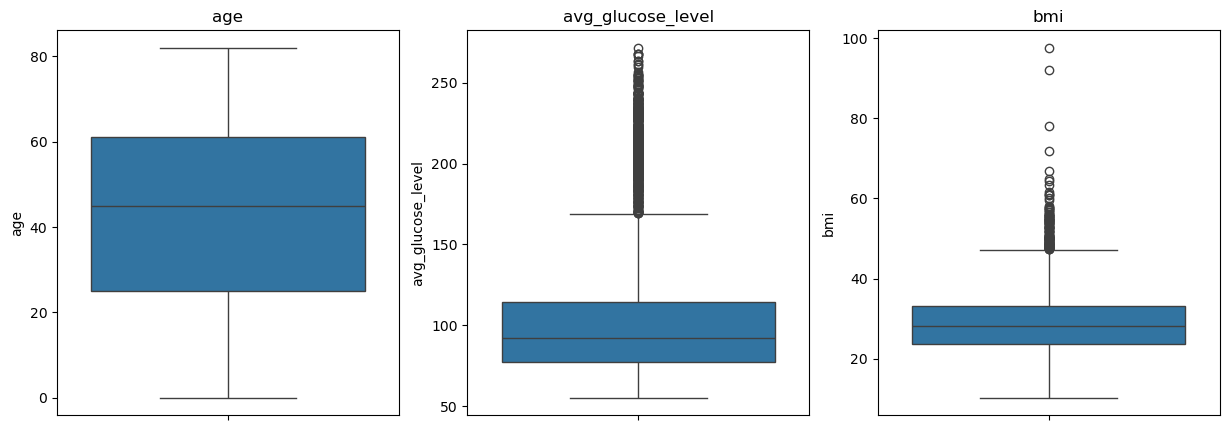

In [34]:
col_num = 3
row_num = len(columns) // col_num

fig, axes = plt.subplots(nrows=row_num, ncols=col_num, figsize=(15,5))
axes = axes.ravel()

for i, col in enumerate(columns):
    sns.boxplot(data=df, ax=axes[i], y=col)
    axes[i].set_title(col)

(array([1250., 1790.,  956.,  310.,  153.,   91.,  209.,  217.,  108.,
          25.]),
 array([ 55.12 ,  76.782,  98.444, 120.106, 141.768, 163.43 , 185.092,
        206.754, 228.416, 250.078, 271.74 ]),
 <BarContainer object of 10 artists>)

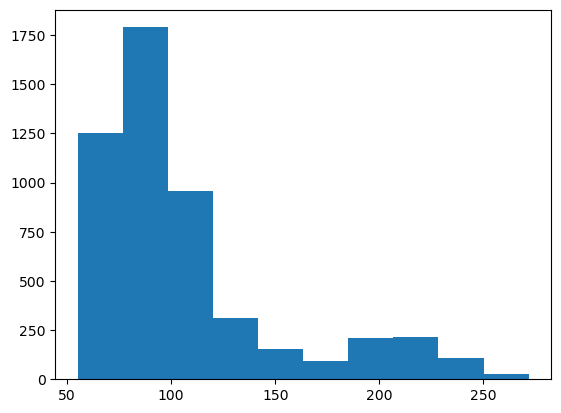

In [35]:
plt.hist(df['avg_glucose_level'])

In [36]:
df['stroke'].value_counts(normalize=True)

stroke
0    0.951262
1    0.048738
Name: proportion, dtype: float64

In [37]:
# # USE IQR Methode to remove Outliers
# Q1 = df['avg_glucose_level'].quantile(0.25)
# Q3 = df['avg_glucose_level'].quantile(0.75)
# IQR = Q3 - Q1

# upper = Q3 + 1.5 * IQR

# # df = df[df['avg_glucose_level'] <= upper]
# df['avg_glucose_level'] = df['avg_glucose_level'].clip(upper=upper)

<Axes: ylabel='avg_glucose_level'>

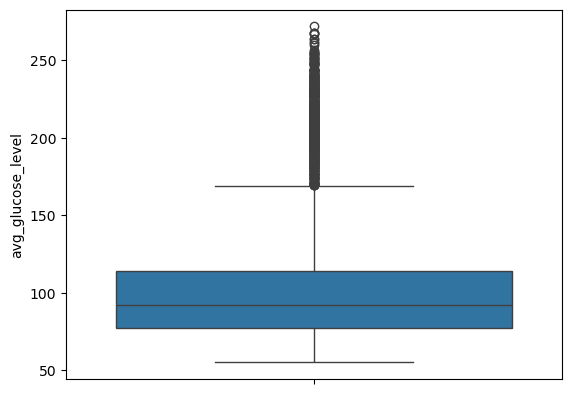

In [38]:
sns.boxplot(y = df['avg_glucose_level'])

<Axes: ylabel='bmi'>

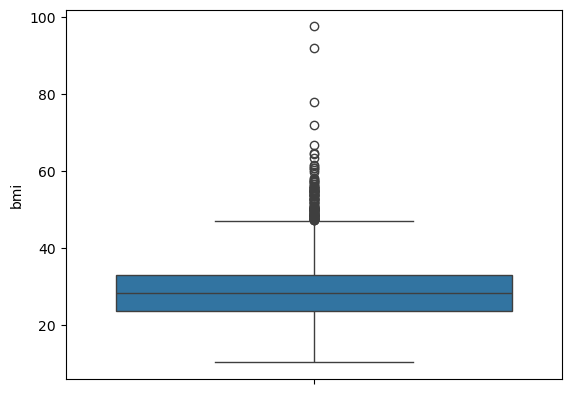

In [39]:
sns.boxplot(y = df['bmi'])

(array([4.170e+02, 2.011e+03, 1.936e+03, 5.930e+02, 1.070e+02, 3.700e+01,
        4.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([10.3 , 19.03, 27.76, 36.49, 45.22, 53.95, 62.68, 71.41, 80.14,
        88.87, 97.6 ]),
 <BarContainer object of 10 artists>)

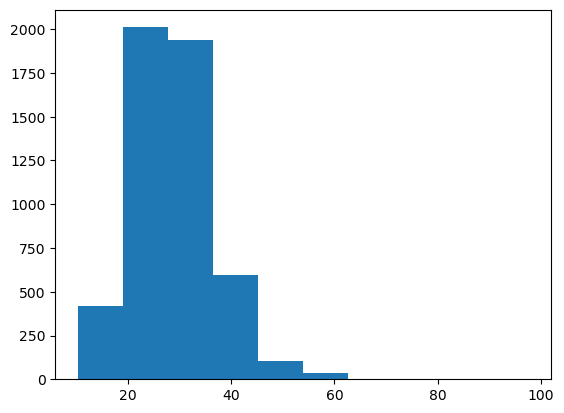

In [40]:
plt.hist(df['bmi'])

In [41]:
# # Since data closely follow a normal distribution so, will Remove outlires use Z-score methode
# from scipy import stats

# z_score = stats.zscore(df['bmi'])
# df = df[np.abs(z_score) <= 3] # Threshold at 3

# USE IQR Methode to remove Outliers
Q1 = df['bmi'].quantile(0.25)
Q3 = df['bmi'].quantile(0.75)
IQR = Q3 - Q1

upper = Q3 + 1.5 * IQR

df = df[df['bmi'] <= upper]
# df['bmi'] = df['bmi'].clip(upper=upper)

<Axes: ylabel='bmi'>

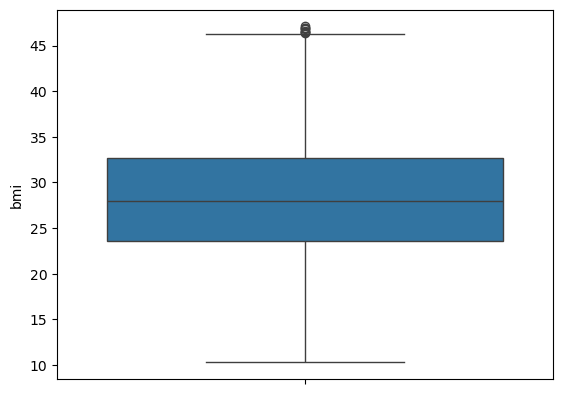

In [42]:
sns.boxplot(y = df['bmi'])

In [43]:
df['stroke'].value_counts(normalize=True)

stroke
0    0.950721
1    0.049279
Name: proportion, dtype: float64

##  Exploratory Data Analysis EDA

In [44]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


### Descriptive statistics

In [45]:
df.describe().round(2)

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4992.00,4992.00,4992.00,4992.00,4992.00,4992.00
mean,43.18,0.10,0.06,105.75,28.36,0.05
std,22.80,0.29,0.23,44.84,6.76,0.22
min,0.00,0.00,0.00,55.12,10.30,0.00
25%,25.00,0.00,0.00,77.20,23.58,0.00
50%,45.00,0.00,0.00,91.84,28.00,0.00
75%,61.00,0.00,0.00,113.81,32.68,0.00
max,82.00,1.00,1.00,271.74,47.10,1.00


In [46]:
df.describe(include ='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,4992,4992,4992,4992,4992
unique,2,2,5,2,3
top,Female,Yes,Private,Urban,never smoked
freq,2902,3261,2841,2545,3359


In [47]:
df.groupby('gender')[['age', 'avg_glucose_level', 'bmi', 'ever_married', 'Residence_type', 'work_type', 'smoking_status', 'hypertension', 'heart_disease', 'stroke']].agg(lambda x: x.mode()[0])

,age,avg_glucose_level,bmi,ever_married,Residence_type,work_type,smoking_status,hypertension,heart_disease,stroke
gender,,,,,,,,,,
Female,78,73.00,23.4,Yes,Urban,Private,never smoked,0,0,0
Male,57,77.82,26.7,Yes,Urban,Private,never smoked,0,0,0


#### the **most frequent value** for each column between **Male & Female**

In [48]:
df.groupby('gender')[['age', 'avg_glucose_level', 'bmi']].agg(['min', 'max', 'mean', 'median'])

age                       avg_glucose_level                      \
       min max       mean median               min     max        mean   
gender                                                                   
Female   0  82  43.686079   44.0             55.12  267.76  103.530848   
Male     0  82  42.468900   46.0             55.22  271.74  108.822517   

                 bmi                          
        median   min   max       mean median  
gender                                        
Female  90.665  10.3  46.9  28.349166   27.7  
Male    93.520  11.5  47.1  28.383206   28.4

In [49]:
# manually adding annotations to each bar in Countplot
# Honstely i get this function from AI tool
def annotate_bars(ax):
    for p in ax.patches:
        count = int(p.get_height())
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.text(x, y + 1, str(count), ha='center', va='bottom')

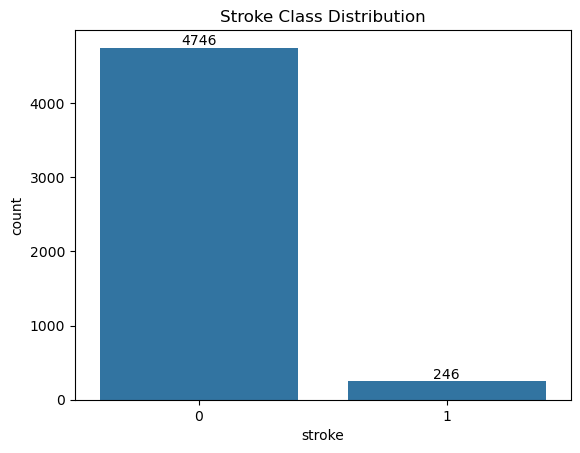

In [50]:
# Target variable distribution
ax = sns.countplot(x='stroke', data=df)
plt.title("Stroke Class Distribution")
annotate_bars(ax)

plt.show()

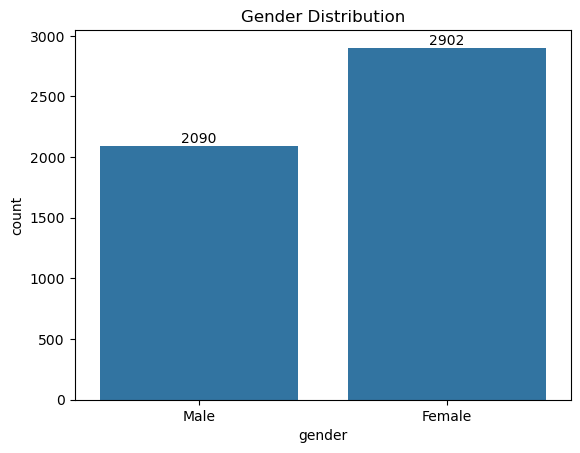

In [51]:
# Gender Distribution
ax = sns.countplot(x='gender', data=df)
plt.title("Gender Distribution")
annotate_bars(ax)
plt.show()

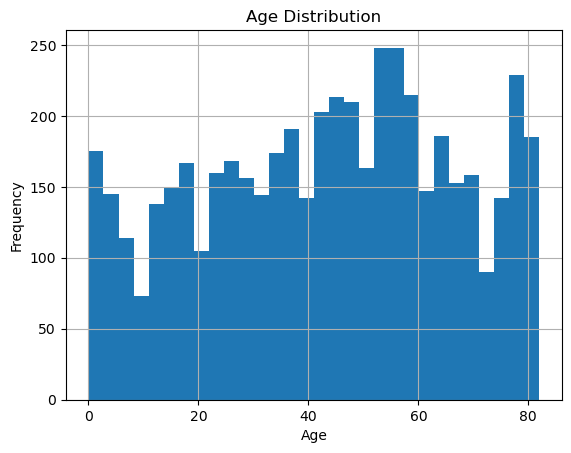

In [52]:
# Age histogram
df['age'].hist(bins=30)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

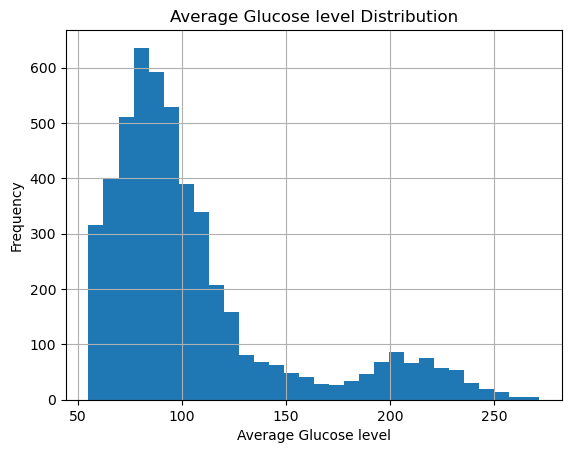

In [53]:
# Average Glucose level histogram
df['avg_glucose_level'].hist(bins=30)
plt.title("Average Glucose level Distribution")
plt.xlabel("Average Glucose level")
plt.ylabel("Frequency")
plt.show()

#### There is significant Right Skewed

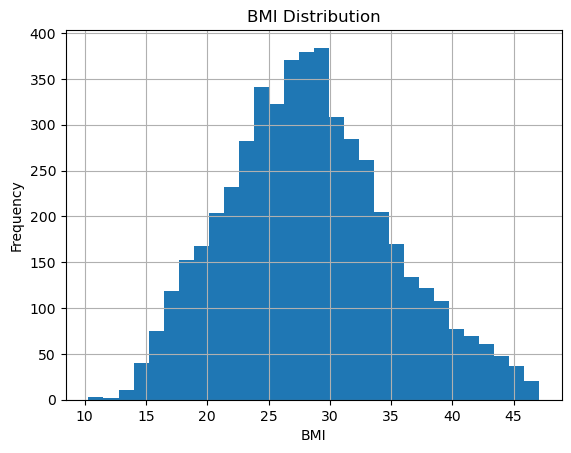

In [54]:
# BMI histogram
df['bmi'].hist(bins=30)
plt.title("BMI Distribution")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#### This chart here shows that **BMI** values are **normally distributed**

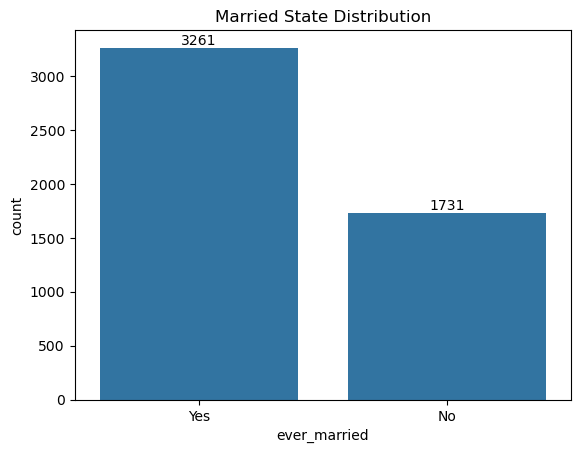

In [55]:
# Married State Distribution
ax = sns.countplot(x='ever_married', data=df)
plt.title("Married State Distribution")
annotate_bars(ax)
plt.show()

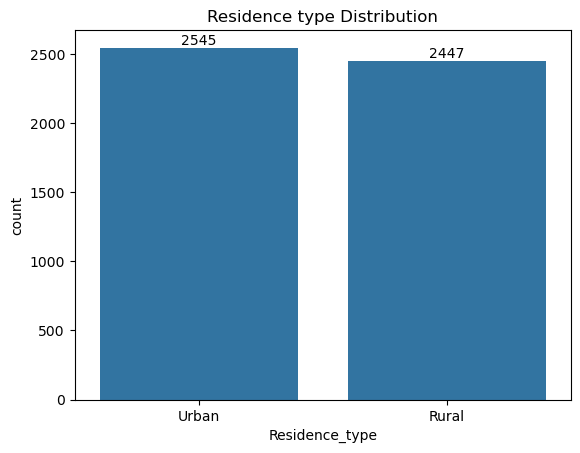

In [56]:
# Residence type Distribution
ax = sns.countplot(x='Residence_type', data=df)
plt.title("Residence type Distribution")
annotate_bars(ax)
plt.show()

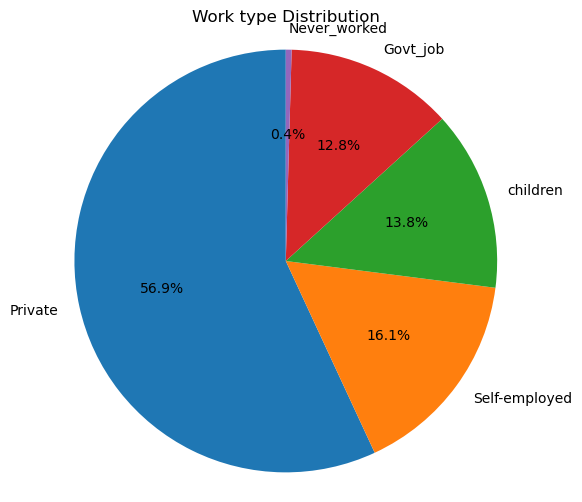

In [57]:
# Work type Distribution
work_type_counts = df['work_type'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(work_type_counts, labels=work_type_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Work type Distribution")
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.show()

#### This chart here shows that most of people work in **Private jobs**

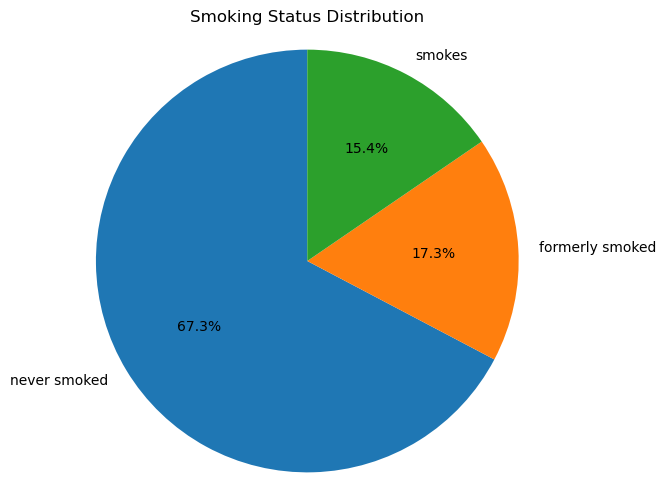

In [58]:
# Smoking Status Distribution
smoking_counts = df['smoking_status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(smoking_counts, labels=smoking_counts.index, autopct='%1.1f%%', startangle=90)
plt.title("Smoking Status Distribution")
plt.axis('equal')  # Equal aspect ratio to make it a circle
plt.show()

#### This chart here shows that most of people **never smoking**

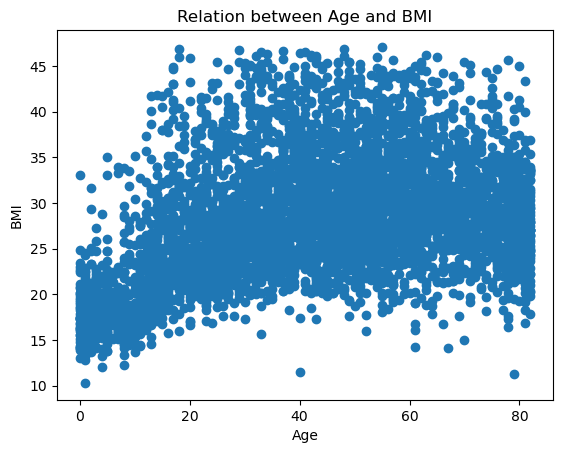

In [59]:
# Relation between Age and BMI

plt.scatter(x=df['age'], y=df['bmi'])
plt.title('Relation between Age and BMI')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

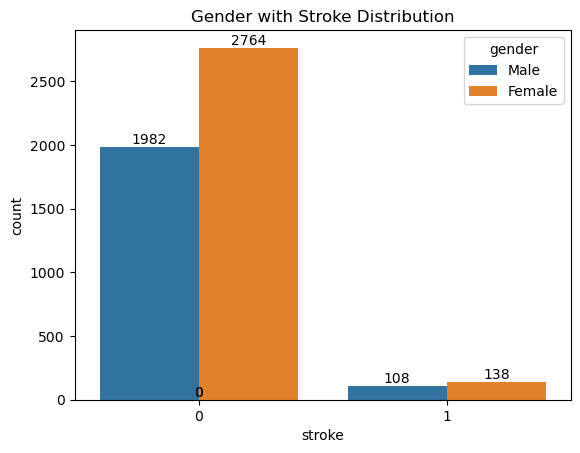

In [60]:
# Gender with Stroke Distribution
ax = sns.countplot(x='stroke', hue='gender', data=df)
plt.title('Gender with Stroke Distribution')
annotate_bars(ax)
plt.show()

#### This chart here shows that there is **no** specific **Gender** has higher percentage to have a **stroke**

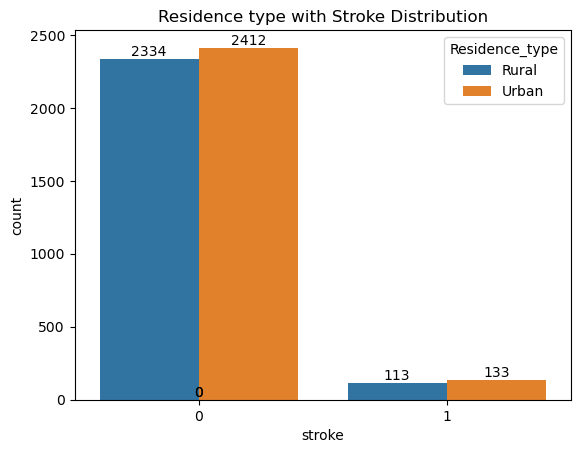

In [61]:
# Residence type with Stroke Distribution
ax = sns.countplot(x='stroke', hue='Residence_type', data=df)
plt.title('Residence type with Stroke Distribution')
annotate_bars(ax)
plt.show()

#### This chart here shows that there is **no** specific **Residence type** has higher percentage to have a **stroke**

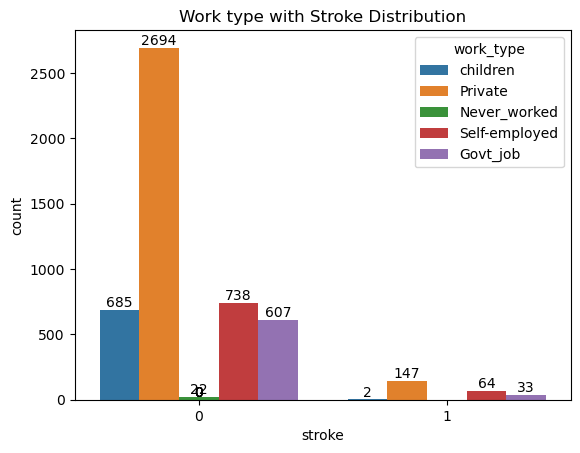

In [62]:
# Work type with Stroke Distribution
ax = sns.countplot(x='stroke', hue='work_type', data=df)
plt.title('Work type with Stroke Distribution')
annotate_bars(ax)
plt.show()

#### This chart here shows that most of **Children** have very less percentage to have a **stroke**

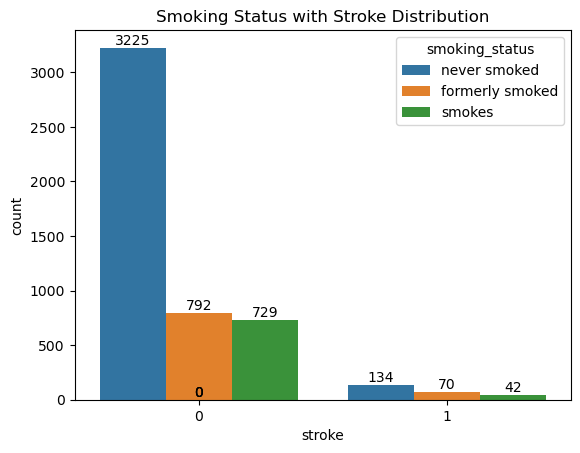

In [63]:
# Smoking Status with Stroke Distribution
ax = sns.countplot(x='stroke', hue='smoking_status', data=df)
plt.title('Smoking Status with Stroke Distribution')
annotate_bars(ax)
plt.show()

#### This chart here shows that most people who **never smoking** are **Less** likely to have a **stroke**
#### and percentage of people who **formerly smoking** are higher likely than or equal to have a **stroke** from people who **Smoking**

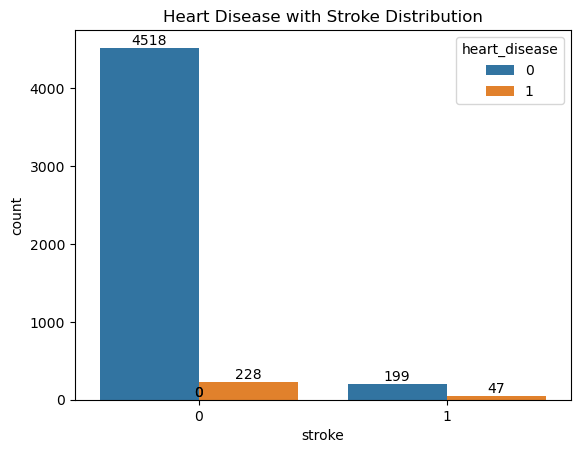

In [64]:
# Heart Disease with Stroke Distribution
ax = sns.countplot(x='stroke', hue='heart_disease', data=df)
plt.title('Heart Disease with Stroke Distribution')
annotate_bars(ax)
plt.show()

#### This chart here shows that most people who do **not** have any **Heart Disease** are **Less** likely to have a **stroke**

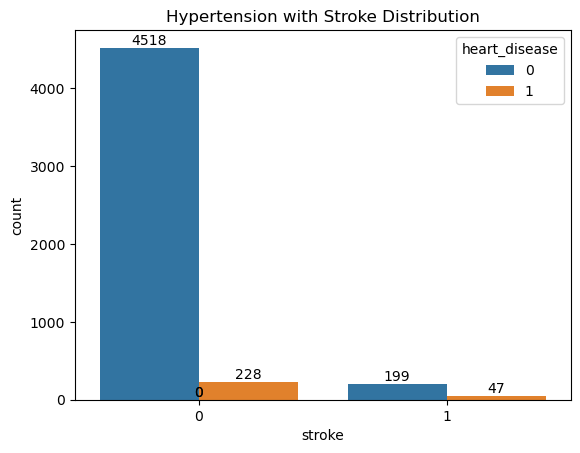

In [65]:
# Hypertension with Stroke Distribution
ax = sns.countplot(x='stroke', hue='heart_disease', data=df)
plt.title('Hypertension with Stroke Distribution')
annotate_bars(ax)
plt.show()

#### This chart here shows that most people who do **not** have any **Hypertension** are **Less** likely to have a **stroke**

## Feature Engineering

In [66]:
df.reset_index(drop='first', inplace=True)

In [67]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.60,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,31.38,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.50,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.40,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.00,never smoked,1


### Data Splitting

In [68]:
X = df.drop(columns='stroke')
y = df['stroke']

In [69]:
y.value_counts()

stroke
0    4746
1     246
Name: count, dtype: int64

#### There is big **unbalanced** problem need to handle it before go to Machine Learning Model

In [70]:
# make 80% from all data to be Training data, and 20% from all data to be testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Feature Encoding

In [71]:
X_train.select_dtypes('object').head()

,gender,ever_married,work_type,Residence_type,smoking_status
191,Female,Yes,Private,Rural,smokes
1765,Female,No,Private,Urban,never smoked
1665,Male,Yes,Private,Rural,never smoked
4075,Male,No,children,Urban,never smoked
879,Female,Yes,Private,Rural,formerly smoked


In [72]:
cat_columns = X_train.select_dtypes('object').columns.tolist()

In [73]:
for col in cat_columns:
    print(df[col].value_counts())
    print('-'*30)

gender
Female    2902
Male      2090
Name: count, dtype: int64
------------------------------
ever_married
Yes    3261
No     1731
Name: count, dtype: int64
------------------------------
work_type
Private          2841
Self-employed     802
children          687
Govt_job          640
Never_worked       22
Name: count, dtype: int64
------------------------------
Residence_type
Urban    2545
Rural    2447
Name: count, dtype: int64
------------------------------
smoking_status
never smoked       3359
formerly smoked     862
smokes              771
Name: count, dtype: int64
------------------------------


In [74]:
# Use Label Encoding for columns that have just 2 category
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()

In [75]:
LE_cat_col = ['gender', 'ever_married', 'Residence_type']

In [76]:
for col in LE_cat_col:
    X_train[col] = LE.fit_transform(X_train[col])
    X_test[col] = LE.transform(X_test[col])

In [77]:
for col in LE_cat_col:
    print(X_train[col].value_counts())
    print('-'*30)

gender
0    2320
1    1673
Name: count, dtype: int64
------------------------------
ever_married
1    2583
0    1410
Name: count, dtype: int64
------------------------------
Residence_type
1    2033
0    1960
Name: count, dtype: int64
------------------------------


In [78]:
# Use One Hot Encoding for columns that have more than 2 category
from sklearn.preprocessing import OneHotEncoder

# drop='first' to avoid multicollinearity
OHE = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

In [79]:
OHE_cat_col = ['work_type', 'smoking_status']

In [80]:
OHE_cat_col_train_np = OHE.fit_transform(X_train[OHE_cat_col])
OHE_cat_col_test_np = OHE.fit_transform(X_test[OHE_cat_col])

In [81]:
# Get the encoded column names
OHE_col_names = OHE.get_feature_names_out(OHE_cat_col)

In [82]:
# # Remove the column name from each new category column ('smoking_status_formerly smoked' -> 'formerly smoked')
# OHE_col_names = [col.replace('smoking_status_', '').replace('work_type_', '') for col in OHE_col_names]

In [83]:
# Create a DataFrame with the encoded values
OHE_cat_train_df = pd.DataFrame(OHE_cat_col_train_np, columns=OHE_col_names, index=X_train.index)
OHE_cat_test_df = pd.DataFrame(OHE_cat_col_test_np, columns=OHE_col_names, index=X_test.index)

In [84]:
OHE_cat_train_df.sample()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
1432,0.0,1.0,0.0,0.0,0.0,0.0


In [85]:
OHE_cat_test_df.sample()

,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
4081,0.0,0.0,1.0,0.0,1.0,0.0


In [86]:
X_train.drop(columns=OHE_cat_col, inplace=True)
X_test.drop(columns=OHE_cat_col, inplace=True)

In [87]:
X_train = pd.concat([X_train, OHE_cat_train_df], axis=1)
X_test = pd.concat([X_test, OHE_cat_test_df], axis=1)

In [88]:
X_train.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
191,0,72,0,0,1,0,97.92,26.9,0.0,1.0,0.0,0.0,0.0,1.0
1765,0,23,0,0,0,1,64.10,19.8,0.0,1.0,0.0,0.0,1.0,0.0
1665,1,35,0,0,1,0,92.82,28.6,0.0,1.0,0.0,0.0,1.0,0.0
4075,1,5,0,0,0,1,69.24,16.7,0.0,0.0,0.0,1.0,1.0,0.0
879,0,25,0,0,1,0,63.64,31.3,0.0,1.0,0.0,0.0,0.0,0.0


In [89]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_never smoked,smoking_status_smokes
676,0,37,0,0,1,1,91.45,25.8,0.0,1.0,0.0,0.0,1.0,0.0
4712,0,79,0,0,1,0,214.73,30.9,0.0,1.0,0.0,0.0,1.0,0.0
3456,0,44,0,0,1,0,100.08,20.9,0.0,1.0,0.0,0.0,0.0,1.0
1558,1,0,0,0,0,1,109.56,14.3,0.0,0.0,0.0,1.0,1.0,0.0
2634,0,59,0,0,1,0,57.47,30.1,0.0,1.0,0.0,0.0,0.0,0.0


In [90]:
X_train.shape, X_test.shape

((3993, 14), (999, 14))

### Feature Selection

#### Try non-linear model for feature importance

In [91]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.sort_values(ascending=False)

selected_features = importances[importances > 0.01].index.tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]
X_train_selected.shape, X_test_selected.shape

((3993, 12), (999, 12))

In [92]:
X_train_selected.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Private',
       'work_type_Self-employed', 'smoking_status_never smoked',
       'smoking_status_smokes'],
      dtype='object')

#### Correlation

<Axes: >

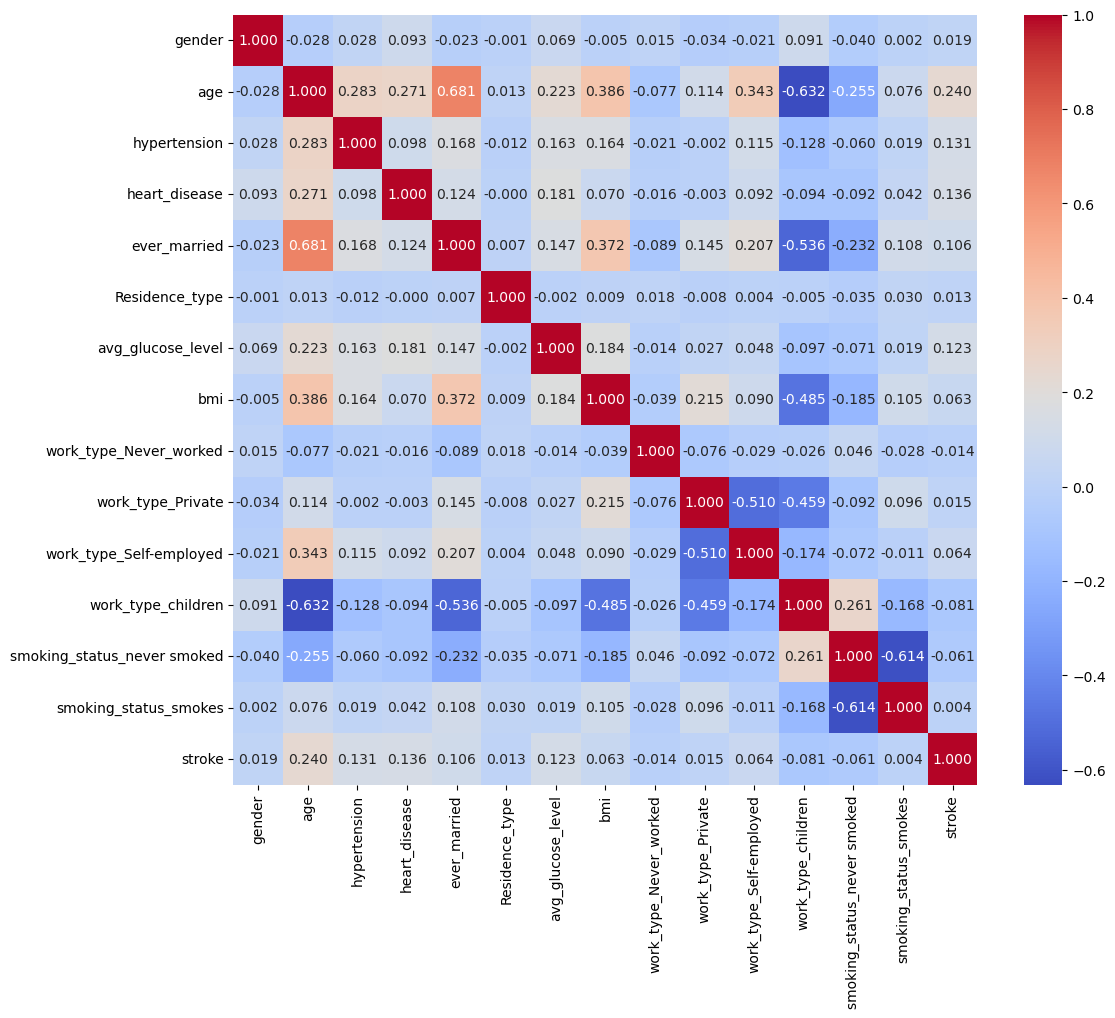

In [93]:
plt.figure(figsize=(12,10))
corr = pd.concat([X_train, y_train], axis=1).corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.3f')

In [94]:
corr['stroke']

gender                         0.019435
age                            0.239514
hypertension                   0.131145
heart_disease                  0.136143
ever_married                   0.106122
Residence_type                 0.012598
avg_glucose_level              0.123066
bmi                            0.062628
work_type_Never_worked        -0.014453
work_type_Private              0.015317
work_type_Self-employed        0.063865
work_type_children            -0.080559
smoking_status_never smoked   -0.060820
smoking_status_smokes          0.003673
stroke                         1.000000
Name: stroke, dtype: float64

In [95]:
corr[np.abs(corr['stroke']) < 0.01]['stroke']

smoking_status_smokes    0.003673
Name: stroke, dtype: float64

In [96]:
X_train.shape

(3993, 14)

Since 'smoking_status_smokes' has very **low** correlation with Target 'smoking_status_smokes', so **Remove** it

In [97]:
X_train.drop(columns='smoking_status_smokes', inplace=True)
X_test.drop(columns='smoking_status_smokes', inplace=True)

#### Variance

In [98]:
from sklearn.feature_selection import VarianceThreshold

# Remove features with variance below a threshold (e.g., 0.01)
selector = VarianceThreshold(threshold=0.01)
selected_columns_train = selector.fit_transform(X_train)
selected_columns_test = selector.transform(X_test)

In [99]:
selected_columns_train.shape, selected_columns_test.shape  # not remove any feature

((3993, 12), (999, 12))

In [100]:
# Get the column names that were kept
selected_columns_train = X_train.columns[selector.get_support()]
selected_columns_test = X_test.columns[selector.get_support()]

# Create a new DataFrame with selected columns
X_train_S = X_train[selected_columns_train]
X_test_S = X_test[selected_columns_test]

In [101]:
X_train_S.shape, X_test_S.shape

((3993, 12), (999, 12))

In [102]:
X_train_S.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'Residence_type', 'avg_glucose_level', 'bmi', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children',
       'smoking_status_never smoked'],
      dtype='object')

#### Lasso (L1-Regularized) Logistic Regression
Automatically shrinks less important feature coefficients to zero

In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler

# Apply scaling after label encoding
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_S)
X_test_scaled = scaler.transform(X_test_S)

# Train L1-regularized logistic regression
model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1, max_iter=500, random_state=42)
model.fit(X_train_scaled, y_train)

LogisticRegression(C=0.1, max_iter=500, penalty='l1', random_state=42,
                   solver='liblinear')

In [104]:
# Feature selector
selector = SelectFromModel(model, prefit=True)

# Get mask of selected features
selected_mask = selector.get_support()
selected_mask

array([False,  True,  True,  True, False, False,  True, False,  True,
        True, False,  True])

In [105]:
# Get selected feature names
selected_features_train = X_train_S.columns[selected_mask]
selected_features_test = X_test_S.columns[selected_mask]

# Create new DataFrame with only selected features
X_train_S = X_train_S[selected_features_train]
X_test_S = X_test_S[selected_features_test]
X_train_S.shape, X_test_S.shape

((3993, 7), (999, 7))

In [106]:
X_train_S.columns

Index(['age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'work_type_Private', 'work_type_Self-employed',
       'smoking_status_never smoked'],
      dtype='object')

### Feature Scaling

In [107]:
X_train_S.sample()

,age,hypertension,heart_disease,avg_glucose_level,work_type_Private,work_type_Self-employed,smoking_status_never smoked
2028,4,0,0,206.25,0.0,0.0,1.0


In [108]:
from sklearn.preprocessing import StandardScaler

SS = StandardScaler()

In [109]:
# # Define columns that need to scale
# scaled_columns = ['age', 'avg_glucose_level']
scaled_columns = X_train_S.select_dtypes('number').columns.tolist()

In [110]:
X_train_SS = X_train_S.copy()
X_test_SS = X_test_S.copy()

for col in scaled_columns:
    X_train_SS[[col]] = SS.fit_transform(X_train_S[[col]])
    X_test_SS[[col]] = SS.transform(X_test_S[[col]])

In [111]:
X_train_SS.head()

,age,hypertension,heart_disease,avg_glucose_level,work_type_Private,work_type_Self-employed,smoking_status_never smoked
191,1.269625,-0.323836,-0.244938,-0.172075,0.862804,-0.440139,-1.431929
1765,-0.876586,-0.323836,-0.244938,-0.933343,0.862804,-0.440139,0.698359
1665,-0.350983,-0.323836,-0.244938,-0.286873,0.862804,-0.440139,0.698359
4075,-1.664989,-0.323836,-0.244938,-0.817644,-1.159012,-0.440139,0.698359
879,-0.788985,-0.323836,-0.244938,-0.943697,0.862804,-0.440139,-1.431929


In [112]:
y_train.value_counts()

stroke
0    3807
1     186
Name: count, dtype: int64

### Sampling

#### Smote & Random Over-Sampling

In [113]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_SSS, y_train_S = smote.fit_resample(X_train_SS, y_train)

# from imblearn.over_sampling import RandomOverSampler

# ROV = RandomOverSampler(random_state=42)
# X_train_SSS, y_train_S = ROV.fit_resample(X_train_SS, y_train)

In [114]:
y_train_S.value_counts()

stroke
1    3807
0    3807
Name: count, dtype: int64

## Modeling

In [115]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

### Hard Margin SVM

In [116]:
# Implement Hard Margin SVM:
# --------------------------
# Note: Hard Margin SVM is sensitive to non-linearly separable data and outliers.
# Since we have handled outliers and the data might not be perfectly separable,
# this model might not perform well, but we implement it as per instructions.
# We use C=very large number to approximate hard margin.
hard_svm = LinearSVC(C=1e10, random_state=42)
hard_svm.fit(X_train_SSS, y_train_S)

LinearSVC(C=10000000000.0, random_state=42)

In [117]:
y_pred_H = hard_svm.predict(X_test_SS)
print("Evaluating Hard Margin SVM:")
print(classification_report(y_test, y_pred_H))

Evaluating Hard Margin SVM:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       939
           1       0.16      0.85      0.27        60

    accuracy                           0.73       999
   macro avg       0.57      0.78      0.55       999
weighted avg       0.94      0.73      0.80       999



In [118]:
y_pred = hard_svm.predict(X_train_SS)
f1_score(y_train, y_pred)

0.21433640880056778

In [119]:
hard_svm_f1_score = f1_score(y_test, y_pred_H)
hard_svm_f1_score

0.272

#### There is **underfitting**

In [120]:
svm_results = {}
svm_results['Hard Margin SVM'] = {'F1-score': hard_svm_f1_score}

### Soft Margin SVM

In [121]:
# Implement Soft Margin SVM with C tuning
param_grid_soft = {'C': [0.1, 1, 10, 100]}

soft_svm = LinearSVC(random_state=42)

grid_search_soft = GridSearchCV(soft_svm, param_grid_soft, cv=5, scoring='f1', n_jobs=-1)
grid_search_soft.fit(X_train_SSS, y_train_S)

GridSearchCV(cv=5, estimator=LinearSVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100]}, scoring='f1')

In [122]:
print(f"Best parameters for Soft Margin SVM: {grid_search_soft.best_params_}")

Best parameters for Soft Margin SVM: {'C': 1}


In [123]:
best_soft_svm = grid_search_soft.best_estimator_

y_pred_S = best_soft_svm.predict(X_test_SS)

print("Evaluating Soft Margin SVM:")
print(classification_report(y_test, y_pred_S))

Evaluating Soft Margin SVM:
              precision    recall  f1-score   support

           0       0.99      0.72      0.83       939
           1       0.16      0.85      0.27        60

    accuracy                           0.73       999
   macro avg       0.57      0.78      0.55       999
weighted avg       0.94      0.73      0.80       999



In [124]:
y_pred = best_soft_svm.predict(X_train_SS)
f1_score(y_train, y_pred)

0.21433640880056778

In [125]:
soft_svm_f1_score = f1_score(y_test, y_pred_S)
soft_svm_f1_score

0.272

#### There is **underfitting**

In [126]:
svm_results['Soft Margin SVM'] = {'Best Parameters': grid_search_soft.best_params_, 'F1-score': soft_svm_f1_score}

### RBF Kernel SVM

In [127]:
# Implement RBF Kernel SVM with gamma tuning
param_grid_rbf = {'gamma': [0.01, 0.1, 1, 'scale']}

rbf_svm = SVC(kernel='rbf', random_state=42)

grid_search_rbf = GridSearchCV(rbf_svm, param_grid_rbf, cv=5, scoring='f1', n_jobs=-1)
grid_search_rbf.fit(X_train_SSS, y_train_S)

GridSearchCV(cv=5, estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'gamma': [0.01, 0.1, 1, 'scale']}, scoring='f1')

In [128]:
print(f"Best parameters for RBF Kernel SVM: {grid_search_rbf.best_params_}")

Best parameters for RBF Kernel SVM: {'gamma': 1}


In [129]:
best_rbf_svm = grid_search_rbf.best_estimator_

y_pred_R = best_rbf_svm.predict(X_test_SS)

print("Evaluating RBF Kernel SVM:")
print(classification_report(y_test, y_pred_R))

Evaluating RBF Kernel SVM:
              precision    recall  f1-score   support

           0       0.96      0.79      0.86       939
           1       0.13      0.48      0.20        60

    accuracy                           0.77       999
   macro avg       0.54      0.64      0.53       999
weighted avg       0.91      0.77      0.82       999



In [130]:
y_pred = best_rbf_svm.predict(X_train_SS)
f1_score(y_train, y_pred)

0.28748890860692106

In [131]:
rbf_svm_f1_score = f1_score(y_test, y_pred_R)
rbf_svm_f1_score

0.20069204152249134

#### There is **underfitting**

In [132]:
svm_results['RBF Kernel SVM'] = {'Best Parameters': grid_search_rbf.best_params_, 'F1-score': rbf_svm_f1_score}

### Polynomial Kernel SVM

In [133]:
# Implement Polynomial Kernel SVM with degree tuning
param_grid_poly = {'degree': [2, 3, 4]}

poly_svm = SVC(kernel='poly', random_state=42)

grid_search_poly = GridSearchCV(poly_svm, param_grid_poly, cv=5, scoring='f1', n_jobs=-1)
grid_search_poly.fit(X_train_SSS, y_train_S)

GridSearchCV(cv=5, estimator=SVC(kernel='poly', random_state=42), n_jobs=-1,
             param_grid={'degree': [2, 3, 4]}, scoring='f1')

In [134]:
print(f"Best parameters for Polynomial Kernel SVM: {grid_search_poly.best_params_}")

Best parameters for Polynomial Kernel SVM: {'degree': 3}


In [135]:
best_poly_svm = grid_search_poly.best_estimator_

y_pred_P = best_poly_svm.predict(X_test_SS)

print("Evaluating Polynomial Kernel SVM:")
print(classification_report(y_test, y_pred_P))

Evaluating Polynomial Kernel SVM:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85       939
           1       0.14      0.65      0.24        60

    accuracy                           0.75       999
   macro avg       0.56      0.70      0.54       999
weighted avg       0.92      0.75      0.81       999



In [136]:
y_pred = best_poly_svm.predict(X_train_SS)
f1_score(y_train, y_pred)

0.2491961414790997

In [137]:
poly_svm_f1_score = f1_score(y_test, y_pred_P)
poly_svm_f1_score

0.23708206686930092

#### There is **underfitting**

In [138]:
svm_results['Polynomial Kernel SVM'] = {'Best Parameters': grid_search_poly.best_params_, 'F1-score': poly_svm_f1_score}

In [139]:
svm_results

{'Hard Margin SVM': {'F1-score': 0.272},
 'Soft Margin SVM': {'Best Parameters': {'C': 1}, 'F1-score': 0.272},
 'RBF Kernel SVM': {'Best Parameters': {'gamma': 1},
  'F1-score': 0.20069204152249134},
 'Polynomial Kernel SVM': {'Best Parameters': {'degree': 3},
  'F1-score': 0.23708206686930092}}

### Decision Boundaries

#### Applying PCA (Principal Component Analysis) before plotting decision boundaries:
To visualize the decision boundary in 2D.

In [140]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_SSS)
X_test_pca = pca.transform(X_test_SS)

In [141]:
def plot_decision_boundary(clf, X, y, title):
    # Create mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))
    
    # Predict over the grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot
    plt.figure(figsize=(7,6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, edgecolor='k', cmap=plt.cm.coolwarm)
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.title(title)
    plt.show()

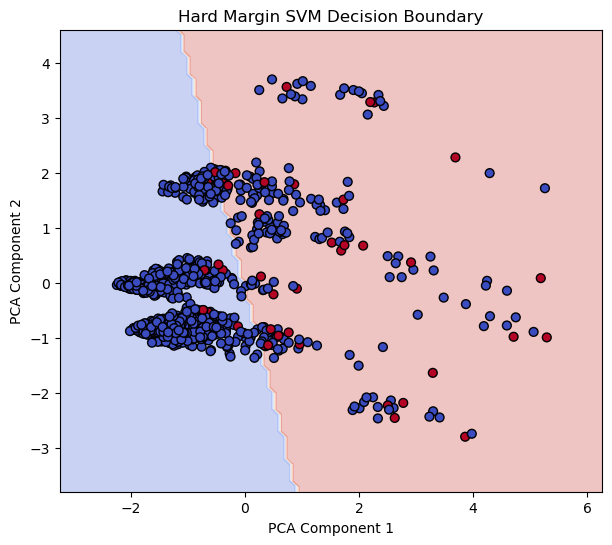

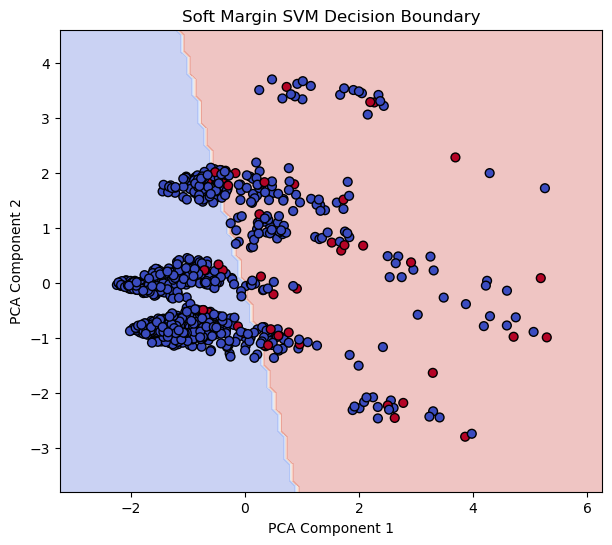

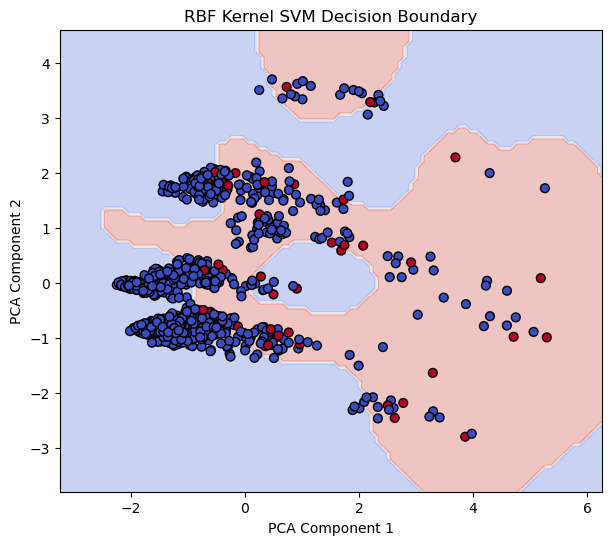

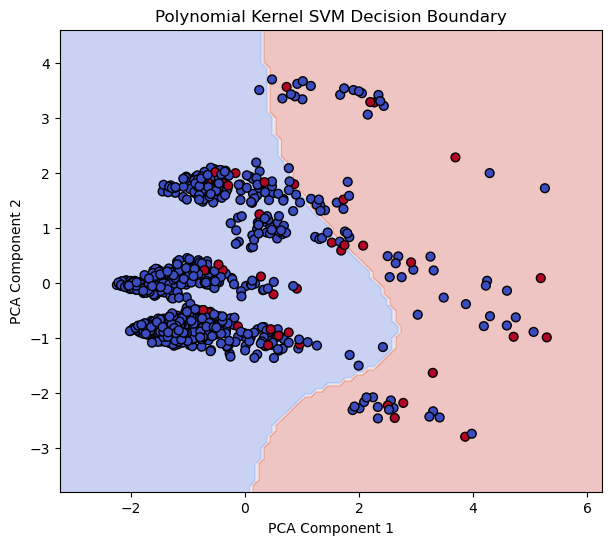

In [142]:
# Plot decision boundaries for all models
hard_svm_pca = LinearSVC(C=1e10, random_state=42).fit(X_train_pca, y_train_S)
soft_svm_pca = best_soft_svm.__class__(C=best_soft_svm.C, random_state=42).fit(X_train_pca, y_train_S)
rbf_svm_pca = best_rbf_svm.__class__(C=best_rbf_svm.C, gamma=best_rbf_svm.gamma, kernel='rbf', random_state=42).fit(X_train_pca, y_train_S)
poly_svm_pca = best_poly_svm.__class__(C=best_poly_svm.C, degree=best_poly_svm.degree, kernel='poly', random_state=42).fit(X_train_pca, y_train_S)

# Plot
plot_decision_boundary(hard_svm_pca, X_test_pca, y_test, "Hard Margin SVM Decision Boundary")
plot_decision_boundary(soft_svm_pca, X_test_pca, y_test, "Soft Margin SVM Decision Boundary")
plot_decision_boundary(rbf_svm_pca, X_test_pca, y_test, "RBF Kernel SVM Decision Boundary")
plot_decision_boundary(poly_svm_pca, X_test_pca, y_test, "Polynomial Kernel SVM Decision Boundary")

### Evaluation

#### All Evaluations of all models in this data is very **bad** because **unbalanced** data